In [26]:
import pandas as pd

# Chemins relatifs
train_path = "projet_data/train.csv"

# --------------
# Import "classique" pour le TRAIN
train_df = pd.read_csv(train_path, encoding="latin-1", sep=",", on_bad_lines='skip')

# Affichage des colonnes
print("Colonnes du fichier TRAIN :")
print(train_df.columns)
print(train_df.info())

Colonnes du fichier TRAIN :
Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (KmÂ²)',
       'Density (P/KmÂ²);;;;;;;;;;;;', 'Density (P/KmÂ²)', 'Unnamed: 11'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20891 entries, 0 to 20890
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   textID                        20890 non-null  object 
 1   text                          20889 non-null  object 
 2   selected_text                 20885 non-null  object 
 3   sentiment                     20891 non-null  object 
 4   Time of Tweet                 20891 non-null  object 
 5   Age of User                   20890 non-null  object 
 6   Country                       20891 non-null  object 
 7   Population -2020              20890 non-null  float64
 8   Land Area (KmÂ²)          

Maintenant que l'importation de nos données est OK, on peut passer au nettoyage du dataset :

In [9]:
#!pip install emoji

In [ ]:
import re
import string
import unicodedata
import emoji

# Mapping des émoticônes ASCII à un token
EMOTICONS = {
    ":-)": " EMO_smile ",   ":)": " EMO_smile ",
    ":-(": " EMO_sad ",     ":(": " EMO_sad ",
    ":D": " EMO_grin ",     ";)": " EMO_wink ",
    ":'(": " EMO_cry ",     ":P": " EMO_tongue ",
    ":o": " EMO_surprise ", ":O": " EMO_surprise ",
    "<3": " EMO_heart ",    "</3": " EMO_broken_heart ",
    ":|": " EMO_neutral ",  ":/": " EMO_confused ",
    "xD": " EMO_laugh ",    "XD": " EMO_laugh ",
}

# Dictionnaire des abréviations courantes
ABBREVIATIONS = {
    "u": "you", "ur": "your", "ure": "you are", "youre": "you are",
    "cant": "cannot", "wont": "will not", "dont": "do not",
    "didnt": "did not", "wasnt": "was not", "werent": "were not",
    "isnt": "is not", "arent": "are not", "hasnt": "has not",
    "havent": "have not", "hadnt": "had not", "shouldnt": "should not",
    "couldnt": "could not", "wouldnt": "would not",
    "im": "i am", "ive": "i have", "ill": "i will", "id": "i would",
    "hes": "he is", "shes": "she is", "its": "it is", "were": "we are",
    "theyre": "they are", "theyve": "they have", "theyll": "they will",
    "youve": "you have", "youll": "you will", "youd": "you would",
    "thats": "that is", "whats": "what is", "wheres": "where is",
    "hows": "how is", "whos": "who is", "whens": "when is",
    "2": "to", "4": "for", "b4": "before", "2day": "today",
    "2morrow": "tomorrow", "2nite": "tonight", "thru": "through",
    "w/": "with", "w/o": "without", "bc": "because", "bcuz": "because",
    "cuz": "because", "n": "and", "ur": "your", "plz": "please",
    "pls": "please", "thx": "thanks", "ty": "thank you",
    "omg": "oh my god", "wtf": "what the fuck", "lol": "laugh out loud",
    "lmao": "laugh my ass off", "rofl": "rolling on floor laughing",
    "brb": "be right back", "ttyl": "talk to you later",
    "imo": "in my opinion", "imho": "in my humble opinion",
    "fyi": "for your information", "btw": "by the way",
    "aka": "also known as", "asap": "as soon as possible",
    "rn": "right now", "nvm": "never mind", "idk": "i do not know",
    "irl": "in real life", "tbh": "to be honest", "smh": "shaking my head",
    "fml": "fuck my life", "yolo": "you only live once"
}

def clean_tweet(text):
    """
    Fonction de nettoyage avancée pour les tweets
    """
    if not isinstance(text, str):
        return ""
    
    # 1. Normalisation Unicode
    text = unicodedata.normalize("NFC", text)
    
    # 2. Supprimer les mentions @user
    text = re.sub(r'@\w+', '', text)
    
    # 3. Supprimer les URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    
    # 4. Transformer emojis en :alias:
    text = emoji.demojize(text, language='alias')
    
    # 5. Remplacer les émoticônes ASCII
    for emo, token in EMOTICONS.items():
        text = text.replace(emo, token)
    
    # 6. Retirer le # des hashtags (garder le mot)
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # 7. Réduire les répétitions de caractères (ex: "hellooooo" → "hello")
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    
    # 8. Minuscules (avant les abréviations pour la correspondance)
    text = text.lower()
    
    # 9. Remplacer les abréviations courantes
    words = text.split()
    words = [ABBREVIATIONS.get(word, word) for word in words]
    text = ' '.join(words)
    
    # 10. Supprimer la ponctuation standard (garder ! et ?)
    keep = "!?"
    punct = ''.join(ch for ch in string.punctuation if ch not in keep)
    text = text.translate(str.maketrans('', '', punct))
    
    # 11. Correction de quelques fautes courantes
    text = re.sub(r'\bteh\b', 'the', text)
    text = re.sub(r'\btaht\b', 'that', text)
    text = re.sub(r'\bwith\b', 'with', text)
    text = re.sub(r'\brecieve\b', 'receive', text)
    text = re.sub(r'\bbelive\b', 'believe', text)
    
    # 12. Gérer les contractions restantes
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'m", " am", text)
    
    # 13. Supprimer les caractères non-alphabétiques isolés (sauf ! et ?)
    text = re.sub(r'\b[^a-zA-Z!?]\b', ' ', text)
    
    # 14. Espaces multiples → un seul et strip
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Test de la fonction améliorée
def test_cleaning():
    test_tweets = [
        "Hellooooo @user! I'm sooooo happy 2day :D http://example.com #amazing",
        "u cant believe wat happened!!! OMG this is crazyyy",
        "I luv this sooo much <3 but idk y people dont like it :(",
        "thx 4 the amazing day!!! cant w8 2 see u again lol",
        "OMG this is the best thing everrrr!!! #blessed 😍 😍 😍"
    ]
    
    print("Tests de la fonction de nettoyage améliorée :")
    print("=" * 60)
    
    for i, tweet in enumerate(test_tweets, 1):
        cleaned = clean_tweet(tweet)
        print(f"Tweet {i}:")
        print(f"Original : {tweet}")
        print(f"Nettoyé  : {cleaned}")
        print("-" * 40)

# Appliquer la fonction améliorée à vos données
def apply_advanced_cleaning(df):
    """
    Applique le nettoyage avancé au dataframe
    """
    print("Application du nettoyage avancé...")
    
    # Remplacer la colonne clean_text existante
    df["clean_text_advanced"] = df["text"].astype(str).apply(clean_tweet)
    
    # Supprimer les lignes où le texte nettoyé est vide
    initial_count = len(df)
    df = df[df['clean_text_advanced'].str.strip().astype(bool)]
    final_count = len(df)
    
    print(f"Lignes supprimées (texte vide après nettoyage) : {initial_count - final_count}")
    print(f"Lignes restantes : {final_count}")
    
    # Afficher quelques exemples
    print("\nExemples de nettoyage :")
    print("=" * 50)
    for i in range(min(5, len(df))):
        if pd.notna(df.iloc[i]['text']):
            print(f"Original : {df.iloc[i]['text']}")
            print(f"Nettoyé  : {df.iloc[i]['clean_text_advanced']}")
            print("-" * 30)
    
    return df

# Lancer les tests
if __name__ == "__main__":
    test_cleaning()

Tests de la fonction de nettoyage améliorée :
Tweet 1:
Original : Hellooooo @user! I'm sooooo happy 2day :D http://example.com #amazing
Nettoyé  : helloo ! im soo happy today emogrin amazing
----------------------------------------
Tweet 2:
Original : u cant believe wat happened!!! OMG this is crazyyy
Nettoyé  : you cannot believe wat happened!! oh my god this is crazyy
----------------------------------------
Tweet 3:
Original : I luv this sooo much <3 but idk y people dont like it :(
Nettoyé  : i luv this soo much emoheart but i do not know y people do not like it emosad
----------------------------------------
Tweet 4:
Original : thx 4 the amazing day!!! cant w8 2 see u again lol
Nettoyé  : thanks for the amazing day!! cannot w8 to see you again laugh out loud
----------------------------------------
Tweet 5:
Original : OMG this is the best thing everrrr!!! #blessed 😍 😍 😍
Nettoyé  : oh my god this is the best thing everr!! blessed hearteyes hearteyes hearteyes
----------------------

In [3]:
# On va créer une nouvelle colonne dans notre dataframe avec le texte nettoyé :
train_df["clean_text"] = train_df["text"].astype(str).apply(clean_tweet)
print(train_df[["text", "clean_text"]].head())

                                             text  \
0                                             NaN   
1   Sooo SAD I will miss you here in San Diego!!!   
2                       my boss is bullying me...   
3                  what interview! leave me alone   
4                                             NaN   

                                    clean_text  
0                                          nan  
1  soo sad i will miss you here in san diego!!  
2                       my boss is bullying me  
3               what interview! leave me alone  
4                                          nan  


In [4]:
train_df = apply_advanced_cleaning(train_df)
print(train_df[["text", "clean_text"]].head())

Application du nettoyage avancé...
Lignes supprimées (texte vide après nettoyage) : 3
Lignes restantes : 27434

Exemples de nettoyage :
Original :  Sooo SAD I will miss you here in San Diego!!!
Nettoyé  : soo sad i will miss you here in san diego!!
------------------------------
Original : my boss is bullying me...
Nettoyé  : my boss is bullying me
------------------------------
Original :  what interview! leave me alone
Nettoyé  : what interview! leave me alone
------------------------------
                                             text  \
0                                             NaN   
1   Sooo SAD I will miss you here in San Diego!!!   
2                       my boss is bullying me...   
3                  what interview! leave me alone   
4                                             NaN   

                                    clean_text  
0                                          nan  
1  soo sad i will miss you here in san diego!!  
2                       my boss is b

On peut voir ici dans le head qu'il y a quand même des valeurs nulles à retirer :

In [5]:
print("Lignes avant :", len(train_df))
print(train_df['clean_text'].head())

print("\n==================\n")
# Supprimer d’abord les tweets manquants
train_df = train_df.dropna(subset=['text'])

# Supprimer les lignes où clean_text est vide ou espaces
train_df = train_df[ train_df['clean_text'].str.strip().astype(bool) ]

# 4) Vérifier qu'on a plus de tweets vides
print("Lignes restantes :", len(train_df))
print(train_df['clean_text'].head())

Lignes avant : 27434
0                                            nan
1    soo sad i will miss you here in san diego!!
2                         my boss is bullying me
3                 what interview! leave me alone
4                                            nan
Name: clean_text, dtype: object


Lignes restantes : 20920
1          soo sad i will miss you here in san diego!!
2                               my boss is bullying me
3                       what interview! leave me alone
5    some shameless plugging for the best rangers f...
6    2am feedings for the baby are fun when he is a...
Name: clean_text, dtype: object


Vérification qu'il ne reste plus de tweets vides : 

In [6]:
print(f"Tweets vides après nettoyage: {(train_df['clean_text'] == '').sum()}")
print(f"Tweets NaN: {train_df['clean_text'].isna().sum()}")

Tweets vides après nettoyage: 0
Tweets NaN: 0


Notre objectif maintenant va être d'entrainer notre modèle sur le fichier 'train', pour pouvoir créer une prédiction sur la colonne sentiment.

In [7]:
# Vérifier que la colonne sentiments contient des sentiments valides
print(train_df["sentiment"].unique())

['negative' 'neutral' 'positive' 'morning' 'night' 'noon']


On peut voir qu'il y a des sentiments en trop dans notre jeu de données. Il faudra donc le nettoyer.

In [9]:
# Nettoyage des NaN et des sentiments invalides
train_df = train_df.dropna(subset=["sentiment"])
sentiments_valides = ['positive', 'negative', 'neutral']
train_df = train_df[train_df["sentiment"].isin(sentiments_valides)]

# Vérifier que la colonne sentiments contient des sentiments valides
print(train_df["sentiment"].unique())

['negative' 'neutral' 'positive']


In [12]:
# =====================================================
# ANALYSE DE SENTIMENTS - PIPELINE COMPLET
# =====================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import pickle
import warnings
warnings.filterwarnings('ignore')

class SentimentAnalyzer:
    def __init__(self):
        self.model = None
        self.vectorizer = None
        self.is_trained = False
        
    def prepare_data(self, df, text_column='clean_text_advanced', target_column='sentiment'):
        """
        ÉTAPE 1: Préparation des données
        """
        print("=== ÉTAPE 1: PRÉPARATION DES DONNÉES ===")
        
        # Supprimer les lignes avec des valeurs manquantes
        df_clean = df.dropna(subset=[text_column, target_column]).copy()
        
        # Vérifier les classes de sentiment
        sentiment_counts = df_clean[target_column].value_counts()
        print(f"Distribution des sentiments:")
        for sentiment, count in sentiment_counts.items():
            print(f"  {sentiment}: {count} ({count/len(df_clean)*100:.1f}%)")
        
        X = df_clean[text_column].values
        y = df_clean[target_column].values
        
        print(f"Total d'échantillons: {len(X)}")
        return X, y
    
    def split_data(self, X, y, test_size=0.2, random_state=42):
        """
        ÉTAPE 2: Division des données
        """
        print("\n=== ÉTAPE 2: DIVISION DES DONNÉES ===")
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, 
            stratify=y  # Pour garder la même proportion de chaque classe
        )
        
        print(f"Données d'entraînement: {len(X_train)}")
        print(f"Données de test: {len(X_test)}")
        
        return X_train, X_test, y_train, y_test
    
    def vectorize_text(self, X_train, X_test=None, max_features=5000):
        """
        ÉTAPE 3: Vectorisation (TF-IDF)
        """
        print("\n=== ÉTAPE 3: VECTORISATION TF-IDF ===")
        
        # Initialiser le vectoriseur TF-IDF
        self.vectorizer = TfidfVectorizer(
            max_features=max_features,
            ngram_range=(1, 2),  # Unigrammes et bigrammes
            min_df=2,  # Ignorer les mots qui apparaissent moins de 2 fois
            max_df=0.8,  # Ignorer les mots qui apparaissent dans plus de 80% des documents
            stop_words='english'
        )
        
        # Fit et transform sur les données d'entraînement
        X_train_vectorized = self.vectorizer.fit_transform(X_train)
        
        print(f"Taille du vocabulaire: {len(self.vectorizer.vocabulary_)}")
        print(f"Forme de la matrice d'entraînement: {X_train_vectorized.shape}")
        
        # Transform sur les données de test si fournies
        X_test_vectorized = None
        if X_test is not None:
            X_test_vectorized = self.vectorizer.transform(X_test)
            print(f"Forme de la matrice de test: {X_test_vectorized.shape}")
        
        return X_train_vectorized, X_test_vectorized
    
    def train_models(self, X_train_vec, y_train):
        """
        ÉTAPE 4: Entraînement de différents modèles
        """
        print("\n=== ÉTAPE 4: ENTRAÎNEMENT DES MODÈLES ===")
        
        # Différents modèles à tester
        models = {
            'Naive Bayes': MultinomialNB(),
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'SVM': SVC(random_state=42, probability=True),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
        }
        
        trained_models = {}
        
        for name, model in models.items():
            print(f"Entraînement de {name}...")
            model.fit(X_train_vec, y_train)
            trained_models[name] = model
        
        return trained_models
    
    def evaluate_models(self, models, X_test_vec, y_test):
        """
        ÉTAPE 5: Évaluation des modèles
        """
        print("\n=== ÉTAPE 5: ÉVALUATION DES MODÈLES ===")
        
        best_score = 0
        best_model_name = None
        results = {}
        
        for name, model in models.items():
            # Prédictions
            y_pred = model.predict(X_test_vec)
            accuracy = accuracy_score(y_test, y_pred)
            
            results[name] = {
                'accuracy': accuracy,
                'predictions': y_pred
            }
            
            print(f"\n--- {name} ---")
            print(f"Précision: {accuracy:.4f}")
            print("\nRapport de classification:")
            print(classification_report(y_test, y_pred))
            
            # Garder le meilleur modèle
            if accuracy > best_score:
                best_score = accuracy
                best_model_name = name
                self.model = model
        
        print(f"\n🏆 MEILLEUR MODÈLE: {best_model_name} (Précision: {best_score:.4f})")
        self.is_trained = True
        return results, best_model_name
    
    def predict_sentiment(self, text):
        """
        ÉTAPE 6: Prédiction sur un nouveau texte
        """
        if not self.is_trained:
            raise ValueError("Le modèle n'est pas encore entraîné!")
        
        # Nettoyer le texte avec votre fonction
        cleaned_text = clean_tweet(text)
        
        # Vectoriser
        text_vectorized = self.vectorizer.transform([cleaned_text])
        
        # Prédire
        prediction = self.model.predict(text_vectorized)[0]
        probabilities = self.model.predict_proba(text_vectorized)[0]
        
        # Récupérer les classes
        classes = self.model.classes_
        
        # Créer un dictionnaire des probabilités
        prob_dict = {classes[i]: probabilities[i] for i in range(len(classes))}
        
        return {
            'text': text,
            'cleaned_text': cleaned_text,
            'prediction': prediction,
            'confidence': max(probabilities),
            'probabilities': prob_dict
        }
    
    def save_model(self, filepath='sentiment_model.pkl'):
        """
        Sauvegarder le modèle entraîné
        """
        if not self.is_trained:
            raise ValueError("Aucun modèle entraîné à sauvegarder!")
        
        model_data = {
            'model': self.model,
            'vectorizer': self.vectorizer
        }
        
        with open(filepath, 'wb') as f:
            pickle.dump(model_data, f)
        
        print(f"Modèle sauvegardé dans {filepath}")
    
    def load_model(self, filepath='sentiment_model.pkl'):
        """
        Charger un modèle sauvegardé
        """
        with open(filepath, 'rb') as f:
            model_data = pickle.load(f)
        
        self.model = model_data['model']
        self.vectorizer = model_data['vectorizer']
        self.is_trained = True
        
        print(f"Modèle chargé depuis {filepath}")

# =====================================================
# UTILISATION COMPLÈTE
# =====================================================

def run_complete_analysis(train_df):
    """
    Pipeline complet d'analyse de sentiments
    """
    print("🚀 DÉMARRAGE DE L'ANALYSE DE SENTIMENTS")
    print("=" * 60)
    
    # Initialiser l'analyseur
    analyzer = SentimentAnalyzer()
    
    # ÉTAPE 1: Préparer les données
    X, y = analyzer.prepare_data(train_df)
    
    # ÉTAPE 2: Diviser les données
    X_train, X_test, y_train, y_test = analyzer.split_data(X, y)
    
    # ÉTAPE 3: Vectoriser
    X_train_vec, X_test_vec = analyzer.vectorize_text(X_train, X_test)
    
    # ÉTAPE 4: Entraîner les modèles
    trained_models = analyzer.train_models(X_train_vec, y_train)
    
    # ÉTAPE 5: Évaluer et choisir le meilleur
    results, best_model = analyzer.evaluate_models(trained_models, X_test_vec, y_test)
    
    # ÉTAPE 6: Sauvegarder le modèle
    analyzer.save_model()
    
    return analyzer

# =====================================================
# TESTS DE PRÉDICTION
# =====================================================

def test_predictions(analyzer):
    """
    Tester des prédictions sur de nouveaux textes
    """
    print("\n" + "=" * 60)
    print("🔮 TESTS DE PRÉDICTION")
    print("=" * 60)
    
    test_sentences = [
        "I love this movie! It's absolutely amazing!",
        "This is the worst day ever. I hate everything.",
        "The weather is okay today, nothing special.",
        "OMG this is sooo good!!! 😍",
        "I'm not sure how I feel about this...",
        "Terrible service, would not recommend.",
        "Perfect! Everything went smoothly.",
        "It's fine, I guess."
    ]
    
    for sentence in test_sentences:
        result = analyzer.predict_sentiment(sentence)
        
        print(f"\nTexte: '{result['text']}'")
        print(f"Nettoyé: '{result['cleaned_text']}'")
        print(f"Prédiction: {result['prediction']} (confiance: {result['confidence']:.3f})")
        print(f"Probabilités: {result['probabilities']}")
        print("-" * 50)

# =====================================================
# EXÉCUTION
# =====================================================

# Pour lancer l'analyse complète:
# analyzer = run_complete_analysis(train_df)
# test_predictions(analyzer)

print("Code prêt!")

Code prêt!


In [13]:
# 1. Lancer l'analyse complète
analyzer = run_complete_analysis(train_df)

# 2. Tester avec des phrases d'exemple
test_predictions(analyzer)

# 3. Prédire sur mes propres textes
result = analyzer.predict_sentiment("I love this product!")
print(result)

🚀 DÉMARRAGE DE L'ANALYSE DE SENTIMENTS
=== ÉTAPE 1: PRÉPARATION DES DONNÉES ===
Distribution des sentiments:
  neutral: 8541 (40.9%)
  positive: 6389 (30.6%)
  negative: 5955 (28.5%)
Total d'échantillons: 20885

=== ÉTAPE 2: DIVISION DES DONNÉES ===
Données d'entraînement: 16708
Données de test: 4177

=== ÉTAPE 3: VECTORISATION TF-IDF ===
Taille du vocabulaire: 5000
Forme de la matrice d'entraînement: (16708, 5000)
Forme de la matrice de test: (4177, 5000)

=== ÉTAPE 4: ENTRAÎNEMENT DES MODÈLES ===
Entraînement de Naive Bayes...
Entraînement de Logistic Regression...
Entraînement de SVM...
Entraînement de Random Forest...

=== ÉTAPE 5: ÉVALUATION DES MODÈLES ===

--- Naive Bayes ---
Précision: 0.6433

Rapport de classification:
              precision    recall  f1-score   support

    negative       0.71      0.49      0.58      1191
     neutral       0.57      0.77      0.65      1708
    positive       0.77      0.61      0.68      1278

    accuracy                           0.64 

In [14]:
#!pip install wordcloud

In [15]:
# =====================================================
# ANALYSE DES MOTS LES PLUS IMPORTANTS - RANDOM FOREST
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

class RandomForestFeatureAnalyzer:
    """
    Analyseur spécialisé pour comprendre les décisions du Random Forest
    """
    
    def __init__(self, model, vectorizer):
        self.model = model
        self.vectorizer = vectorizer
        self.feature_names = vectorizer.get_feature_names_out()
        self.feature_importances = model.feature_importances_
    
    def get_top_features(self, top_n=50):
        """
        Obtenir les mots les plus importants globalement
        """
        print(f"🔍 TOP {top_n} MOTS LES PLUS IMPORTANTS POUR LE RANDOM FOREST")
        print("=" * 70)
        
        # Créer un DataFrame pour faciliter l'analyse
        importance_df = pd.DataFrame({
            'word': self.feature_names,
            'importance': self.feature_importances
        }).sort_values('importance', ascending=False)
        
        top_features = importance_df.head(top_n)
        
        print(f"{'Rang':<4} {'Mot/N-gramme':<25} {'Importance':<12} {'Barre'}")
        print("-" * 70)
        
        for i, (_, row) in enumerate(top_features.iterrows(), 1):
            bar = "█" * int(row['importance'] * 1000)  # Barre visuelle
            print(f"{i:<4} {row['word']:<25} {row['importance']:<12.6f} {bar}")
        
        return top_features
    
    def analyze_sentiment_words(self, analyzer, top_n=30):
        """
        Analyser quels mots influencent le plus chaque sentiment
        """
        print(f"\n🎯 ANALYSE PAR SENTIMENT (Top {top_n} par classe)")
        print("=" * 70)
        
        # Créer des phrases de test pour chaque mot important
        top_features = self.get_top_features(100)  # Prendre plus pour l'analyse
        
        sentiment_influence = {'positive': [], 'negative': [], 'neutral': []}
        
        for word in top_features['word'].head(100):  # Test sur top 100
            # Créer une phrase simple avec ce mot
            test_phrase = f"this is {word}"
            
            try:
                result = analyzer.predict_sentiment(test_phrase)
                sentiment = result['prediction']
                confidence = result['confidence']
                
                # Si la confiance est élevée, ce mot influence ce sentiment
                if confidence > 0.5:
                    sentiment_influence[sentiment].append({
                        'word': word,
                        'confidence': confidence,
                        'probabilities': result['probabilities']
                    })
            except:
                continue
        
        # Afficher les résultats par sentiment
        for sentiment in ['positive', 'negative', 'neutral']:
            print(f"\n🔹 MOTS INFLUENÇANT LE SENTIMENT '{sentiment.upper()}':")
            print("-" * 50)
            
            # Trier par confiance
            words = sorted(sentiment_influence[sentiment], 
                          key=lambda x: x['confidence'], reverse=True)
            
            for i, item in enumerate(words[:top_n], 1):
                prob = item['probabilities'][sentiment]
                print(f"{i:2d}. {item['word']:<20} → {prob:.3f} ({item['confidence']:.3f})")
        
        return sentiment_influence
    
    def create_feature_importance_plot(self, top_n=20):
        """
        Créer un graphique des mots les plus importants
        """
        importance_df = pd.DataFrame({
            'word': self.feature_names,
            'importance': self.feature_importances
        }).sort_values('importance', ascending=False).head(top_n)
        
        plt.figure(figsize=(12, 8))
        bars = plt.barh(range(len(importance_df)), importance_df['importance'])
        plt.yticks(range(len(importance_df)), importance_df['word'])
        plt.xlabel('Importance')
        plt.title(f'Top {top_n} Mots les Plus Importants - Random Forest')
        plt.gca().invert_yaxis()
        
        # Colorer les barres selon l'importance
        colors = plt.cm.viridis(importance_df['importance'] / importance_df['importance'].max())
        for bar, color in zip(bars, colors):
            bar.set_color(color)
        
        plt.tight_layout()
        plt.show()
        
        return importance_df
    
    def create_wordcloud_by_importance(self, top_n=100):
        """
        Créer un nuage de mots basé sur l'importance
        """
        importance_df = pd.DataFrame({
            'word': self.feature_names,
            'importance': self.feature_importances
        }).sort_values('importance', ascending=False).head(top_n)
        
        # Créer un dictionnaire pour WordCloud
        word_freq = dict(zip(importance_df['word'], importance_df['importance']))
        
        plt.figure(figsize=(15, 8))
        wordcloud = WordCloud(
            width=800, height=400,
            background_color='white',
            max_words=top_n,
            colormap='viridis'
        ).generate_from_frequencies(word_freq)
        
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Nuage de Mots - Importance dans le Random Forest')
        plt.tight_layout()
        plt.show()
    
    def analyze_ngrams(self):
        """
        Analyser les n-grammes les plus importants
        """
        print("\n📝 ANALYSE DES N-GRAMMES")
        print("=" * 50)
        
        importance_df = pd.DataFrame({
            'ngram': self.feature_names,
            'importance': self.feature_importances
        }).sort_values('importance', ascending=False)
        
        # Séparer par type de n-gramme
        unigrams = importance_df[~importance_df['ngram'].str.contains(' ')].head(15)
        bigrams = importance_df[importance_df['ngram'].str.count(' ') == 1].head(15)
        trigrams = importance_df[importance_df['ngram'].str.count(' ') == 2].head(10)
        
        print("🔸 TOP UNIGRAMS (mots simples):")
        for i, (_, row) in enumerate(unigrams.iterrows(), 1):
            print(f"{i:2d}. {row['ngram']:<15} ({row['importance']:.6f})")
        
        print("\n🔸 TOP BIGRAMS (2 mots):")
        for i, (_, row) in enumerate(bigrams.iterrows(), 1):
            print(f"{i:2d}. {row['ngram']:<20} ({row['importance']:.6f})")
        
        if len(trigrams) > 0:
            print("\n🔸 TOP TRIGRAMS (3 mots):")
            for i, (_, row) in enumerate(trigrams.iterrows(), 1):
                print(f"{i:2d}. {row['ngram']:<25} ({row['importance']:.6f})")
        
        return {'unigrams': unigrams, 'bigrams': bigrams, 'trigrams': trigrams}
    
    def compare_words_impact(self, word_pairs, analyzer):
        """
        Comparer l'impact de mots opposés
        """
        print("\n⚖️  COMPARAISON DE MOTS OPPOSÉS")
        print("=" * 50)
        
        for positive_word, negative_word in word_pairs:
            print(f"\n🔹 '{positive_word}' vs '{negative_word}':")
            
            # Test avec phrases simples
            pos_result = analyzer.predict_sentiment(f"this is {positive_word}")
            neg_result = analyzer.predict_sentiment(f"this is {negative_word}")
            
            print(f"   '{positive_word}' → {pos_result['prediction']} ({pos_result['confidence']:.3f})")
            print(f"   '{negative_word}' → {neg_result['prediction']} ({neg_result['confidence']:.3f})")
    
    def get_feature_statistics(self):
        """
        Statistiques générales sur les features
        """
        print("\n📊 STATISTIQUES DES FEATURES")
        print("=" * 40)
        
        print(f"Nombre total de features: {len(self.feature_names)}")
        print(f"Importance moyenne: {np.mean(self.feature_importances):.6f}")
        print(f"Importance médiane: {np.median(self.feature_importances):.6f}")
        print(f"Écart-type: {np.std(self.feature_importances):.6f}")
        print(f"Importance max: {np.max(self.feature_importances):.6f}")
        print(f"Importance min: {np.min(self.feature_importances):.6f}")
        
        # Features avec importance > moyenne
        above_avg = len(self.feature_importances[self.feature_importances > np.mean(self.feature_importances)])
        print(f"Features au-dessus de la moyenne: {above_avg} ({above_avg/len(self.feature_names)*100:.1f}%)")

# =====================================================
# FONCTION PRINCIPALE D'ANALYSE
# =====================================================

def analyze_random_forest_features(analyzer, detailed=True):
    """
    Analyse complète des features du Random Forest
    """
    print("🌳 ANALYSE DÉTAILLÉE DU RANDOM FOREST")
    print("=" * 60)
    
    # Créer l'analyseur de features
    rf_analyzer = RandomForestFeatureAnalyzer(analyzer.model, analyzer.vectorizer)
    
    # 1. Statistiques générales
    rf_analyzer.get_feature_statistics()
    
    # 2. Top features globaux
    top_features = rf_analyzer.get_top_features(30)
    
    # 3. Analyse des n-grammes
    ngrams = rf_analyzer.analyze_ngrams()
    
    if detailed:
        # 4. Analyse par sentiment
        sentiment_words = rf_analyzer.analyze_sentiment_words(analyzer, 20)
        
        # 5. Comparaison de mots opposés
        word_pairs = [
            ('love', 'hate'),
            ('good', 'bad'),
            ('happy', 'sad'),
            ('amazing', 'terrible'),
            ('perfect', 'awful'),
            ('best', 'worst')
        ]
        rf_analyzer.compare_words_impact(word_pairs, analyzer)
        
        # 6. Visualisations (décommentez si vous avez matplotlib)
        print("\n📈 Création des visualisations...")
        try:
            importance_plot = rf_analyzer.create_feature_importance_plot(25)
            # rf_analyzer.create_wordcloud_by_importance(50)  # Décommentez si WordCloud installé
        except Exception as e:
            print(f"Erreur visualisation: {e}")
    
    return rf_analyzer, top_features

# =====================================================
# ANALYSE SPÉCIFIQUE POUR VOTRE MODÈLE
# =====================================================

def quick_feature_analysis(analyzer):
    """
    Analyse rapide des features les plus importantes
    """
    print("⚡ ANALYSE RAPIDE DES FEATURES")
    print("=" * 40)
    
    feature_names = analyzer.vectorizer.get_feature_names_out()
    importances = analyzer.model.feature_importances_
    
    # Top 20 features
    indices = np.argsort(importances)[::-1][:20]
    
    print("🏆 TOP 20 MOTS LES PLUS DÉCISIFS:")
    print("-" * 40)
    for i, idx in enumerate(indices, 1):
        word = feature_names[idx]
        importance = importances[idx]
        
        # Tester rapidement l'influence
        test_result = analyzer.predict_sentiment(f"this is {word}")
        sentiment = test_result['prediction']
        confidence = test_result['confidence']
        
        print(f"{i:2d}. {word:<20} → {sentiment:<8} ({confidence:.3f}) [{importance:.6f}]")
    
    return [(feature_names[idx], importances[idx]) for idx in indices]

# =====================================================
# UTILISATION
# =====================================================

print("🚀 Fonctions disponibles pour analyser votre Random Forest:")
print("1. quick_feature_analysis(analyzer)           # Analyse rapide")
print("2. analyze_random_forest_features(analyzer)   # Analyse complète")
print("3. rf_analyzer.get_top_features(50)          # Top N features")
print("4. rf_analyzer.analyze_ngrams()              # Analyse n-grammes")

🚀 Fonctions disponibles pour analyser votre Random Forest:
1. quick_feature_analysis(analyzer)           # Analyse rapide
2. analyze_random_forest_features(analyzer)   # Analyse complète
3. rf_analyzer.get_top_features(50)          # Top N features
4. rf_analyzer.analyze_ngrams()              # Analyse n-grammes


⚡ ANALYSE RAPIDE DES FEATURES
🏆 TOP 20 MOTS LES PLUS DÉCISIFS:
----------------------------------------
 1. love                 → positive (1.000) [0.020493]
 2. good                 → positive (0.785) [0.016759]
 3. thanks               → positive (0.931) [0.015564]
 4. miss                 → negative (0.973) [0.013484]
 5. happy                → positive (0.503) [0.012759]
 6. sad                  → negative (1.000) [0.011820]
 7. great                → positive (0.628) [0.009628]
 8. nice                 → positive (1.000) [0.008991]
 9. hate                 → negative (1.000) [0.007783]
10. thank                → positive (1.000) [0.007467]
11. fun                  → positive (1.000) [0.007158]
12. sorry                → negative (0.769) [0.006499]
13. awesome              → positive (1.000) [0.006428]
14. day                  → neutral  (0.677) [0.006297]
15. hope                 → positive (0.910) [0.006208]
16. sucks                → negative (1.000) [0.005648]
17. bad         

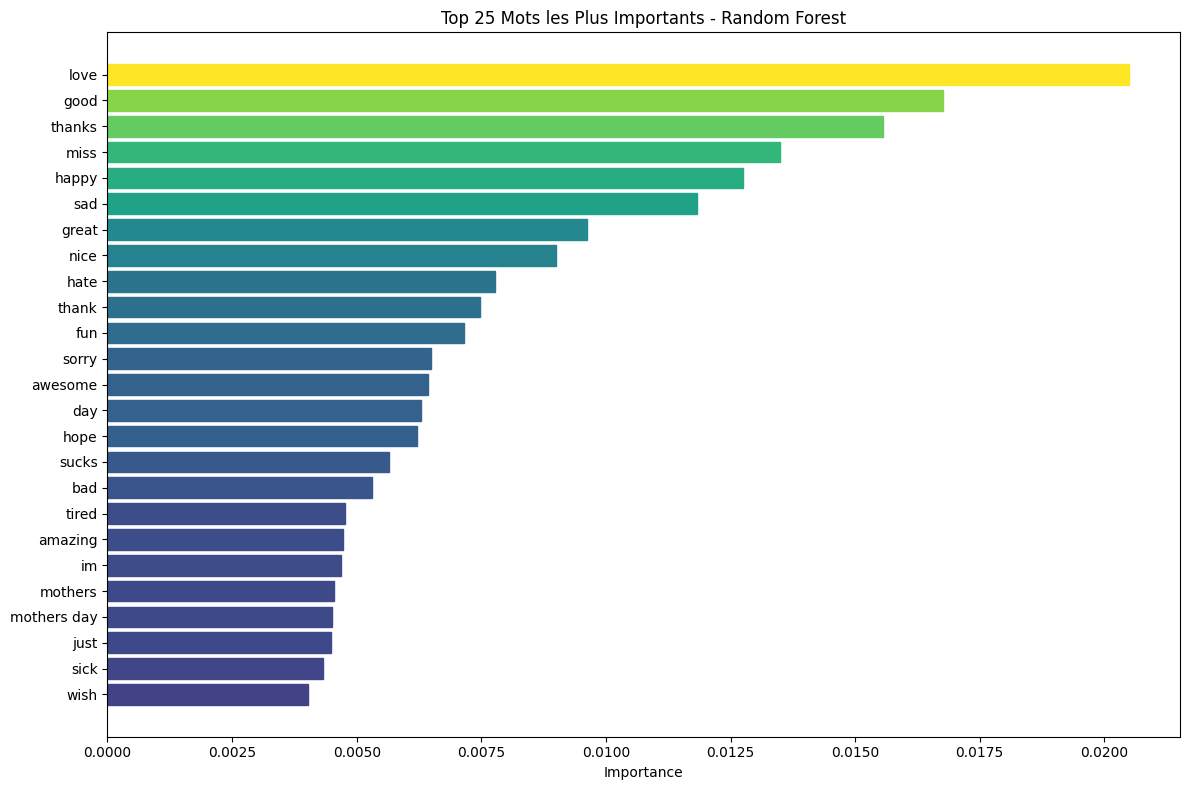

In [16]:
# Analyse rapide (recommandée pour commencer)
quick_feature_analysis(analyzer)

# OU analyse complète et détaillée
rf_analyzer, top_features = analyze_random_forest_features(analyzer)

Rapport de classification sur tout le dataset :
              precision    recall  f1-score   support

    negative       0.95      0.90      0.92      5955
     neutral       0.91      0.94      0.92      8541
    positive       0.94      0.94      0.94      6389

    accuracy                           0.93     20885
   macro avg       0.93      0.93      0.93     20885
weighted avg       0.93      0.93      0.93     20885



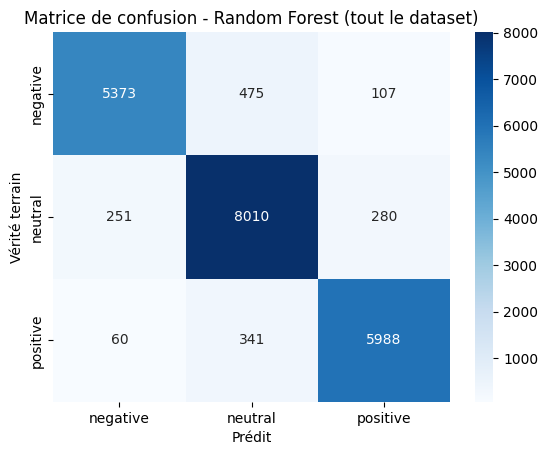


Exemples où le modèle s'est trompé :
                                                  text  \
7                                           Soooo high   
12        My Sharpie is running DANGERously low on ink   
19                          Hes just not that into you   
30   I`m going home now. Have you seen my new twitt...   
32    If it is any consolation I got my BMI tested ...   
62                                 I give in to easily   
67   Yay playing a show tonight! Boo it`s gonna sog...   
68                                            Chilliin   
71    a celtics-lakers rematch sounds better don`t ...   
117                              hahaa your awesomee !   

                                   clean_text_advanced sentiment  \
7                                             soo high   neutral   
12        my sharpie is running dangerously low on ink  negative   
19                        he is just not that into you   neutral   
30   im going home now have you seen my new twitter

In [17]:
# On applique la prédiction sur tout le DataFrame
X_all = train_df["clean_text_advanced"]
y_true = train_df["sentiment"]

# Vectorisation du texte
X_all_vect = analyzer.vectorizer.transform(X_all)

# Prédiction sur tout le DataFrame
y_pred = analyzer.model.predict(X_all_vect)

# Ajout des prédictions dans le DataFrame
train_df["predicted_sentiment"] = y_pred

# Affichage des performances globales
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Rapport de classification sur tout le dataset :")
print(classification_report(y_true, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred, labels=analyzer.model.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=analyzer.model.classes_, yticklabels=analyzer.model.classes_)
plt.xlabel("Prédit")
plt.ylabel("Vérité terrain")
plt.title("Matrice de confusion - Random Forest (tout le dataset)")
plt.show()

# Exemples d'erreurs
print("\nExemples où le modèle s'est trompé :")
erreurs = train_df[train_df["sentiment"] != train_df["predicted_sentiment"]]
print(erreurs[["text", "clean_text_advanced", "sentiment", "predicted_sentiment"]].head(10))

Nous avons eu avec ce nouvel entrainement un précision de 93% sur tout le dataset, ce qui est énorme.

Les scores F1 (0.92–0.94) montrent que le modèle est équilibré sur les trois classes.

Negative a une très bonne précision (0.95) : le modèle ne prédit “negative” que quand il en est sûr.

Neutral a un très bon recall (0.94) : il arrive à bien “repérer” les phrases neutres.

Positive est bien équilibré aussi.

## Analyse des sentiments par pays et moments dans la journée

Regardons d'abord comment est faite la colonne 'Time of tweet' pour la nettoyer si besoin :

In [18]:
train_df["Time of Tweet"].unique()

array(['noon', 'night', 'morning'], dtype=object)

In [19]:
pd.crosstab(train_df["Time of Tweet"], train_df["sentiment"])

sentiment,negative,neutral,positive
Time of Tweet,,,
morning,1963,2933,2111
night,1957,2765,2143
noon,2035,2843,2135


In [20]:
# Prendre les 3 pays les plus fréquents
top_countries = train_df["Country"].value_counts().head(3).index
filtered = train_df[train_df["Country"].isin(top_countries)]

pd.crosstab([filtered["Country"], filtered["Time of Tweet"]], filtered["sentiment"])

,sentiment,negative,neutral,positive
Country,Time of Tweet,,,
Armenia,noon,29,53,41
Djibouti,night,36,51,39
Kuwait,morning,33,52,40


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Séparation des variables
X = train_df[['clean_text_advanced', 'Country', 'Time of Tweet']]
y = train_df['sentiment']

# Préprocessing : texte et variables catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'clean_text_advanced'),
        ('country', OneHotEncoder(), ['Country']),
        ('time', OneHotEncoder(), ['Time of Tweet'])
    ]
)

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier())
])

# Entraînement
pipeline.fit(X, y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'clean_text_advanced'),
                                                 ('country', OneHotEncoder(),
                                                  ['Country']),
                                                 ('time', OneHotEncoder(),
                                                  ['Time of Tweet'])])),
                ('clf', RandomForestClassifier())])

In [22]:
example = pd.DataFrame([{
    "clean_text_advanced": "jean dujardin is the best actor",
    "Country": "France",
    "Time of Tweet": "morning"
}])

result = pipeline.predict(example)
proba = pipeline.predict_proba(example)
print("Sentiment prédit :", result[0])
print("Probabilité par classe :", proba)

Sentiment prédit : positive
Probabilité par classe : [[0.02 0.27 0.71]]


In [25]:
import joblib

# Sauvegarder le pipeline complet
joblib.dump(pipeline, "models/sentiment_pipeline.joblib")

['models/sentiment_pipeline.joblib']